In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"heenafirdouse","key":"87919880e093fbc8a9a984e56b8639e9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d aryashah2k/mango-leaf-disease-dataset

 92% 95.0M/103M [00:00<00:00, 127MB/s]
100% 103M/103M [00:00<00:00, 128MB/s] 


In [ ]:
#!unzip /content/mango-leaf-disease-dataset.zip

In [ ]:
import os
import random
from shutil import copyfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
import PIL.Image
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
#[1] below code reference: 
#https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified
#https://stackoverflow.com/questions/57394135/split-image-dataset-into-train-test-datasets
#https://www.kaggle.com/questions-and-answers/102677

dataset_dir = "/content"
train_test_dir = "/content/train_test/"
test_percent = 20

os.makedirs(os.path.join(train_test_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(train_test_dir, "test"), exist_ok=True)

categories = [ "Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]
category_images = {category: [] for category in categories}

for category in categories:
    image_files = os.listdir(os.path.join(dataset_dir, category))
    random.shuffle(image_files)
    category_images[category] = image_files

images_per_category = len(category_images["Healthy"])
test_images_per_category = int(images_per_category * test_percent / 100)
train_images_per_category = images_per_category - test_images_per_category

for category in categories:
    for i, image_file in enumerate(category_images[category]):
        source_path = os.path.join(dataset_dir, category, image_file)
        if i < train_images_per_category:
            destination_dir = os.path.join(train_test_dir, "train", category)
        else:
            destination_dir = os.path.join(train_test_dir, "test", category)
        destination_path = os.path.join(destination_dir, image_file)
        os.makedirs(destination_dir, exist_ok=True)
        copyfile(source_path, destination_path)


In [ ]:

#[2]:below code reference :https://www.kaggle.com/code/agbajeabdullateef/mango-disease-classification

train_dir = '/content/train_test/train'
test_dir = '/content/train_test/test'


training_samples = sum(len(files) for _, _, files in os.walk(train_dir))

batch_size = int(training_samples/13)

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

#[3] below code reference : https://keras.io/api/models/sequential/
#  CNN model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])




Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


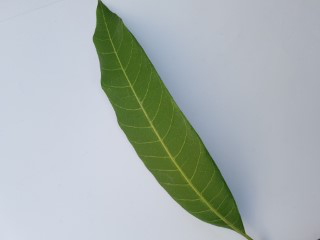

In [ ]:
#[2]:below code reference :https://www.kaggle.com/code/agbajeabdullateef/mango-disease-classification
train_dir = Path(train_dir)
healthy_train = list(train_dir.glob('Healthy/*'))
PIL.Image.open(str(healthy_train[0]))

In [ ]:
#[2]:below code reference :https://www.kaggle.com/code/agbajeabdullateef/mango-disease-classification
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['Die Back', 'Cutting Weevil', 'Anthracnose', 'Sooty Mould',
       'Powdery Mildew', 'Healthy', 'Gall Midge', 'Bacterial Canker'],
      dtype='<U16')

In [ ]:
#[2]:below code reference :https://www.kaggle.com/code/agbajeabdullateef/mango-disease-classification
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

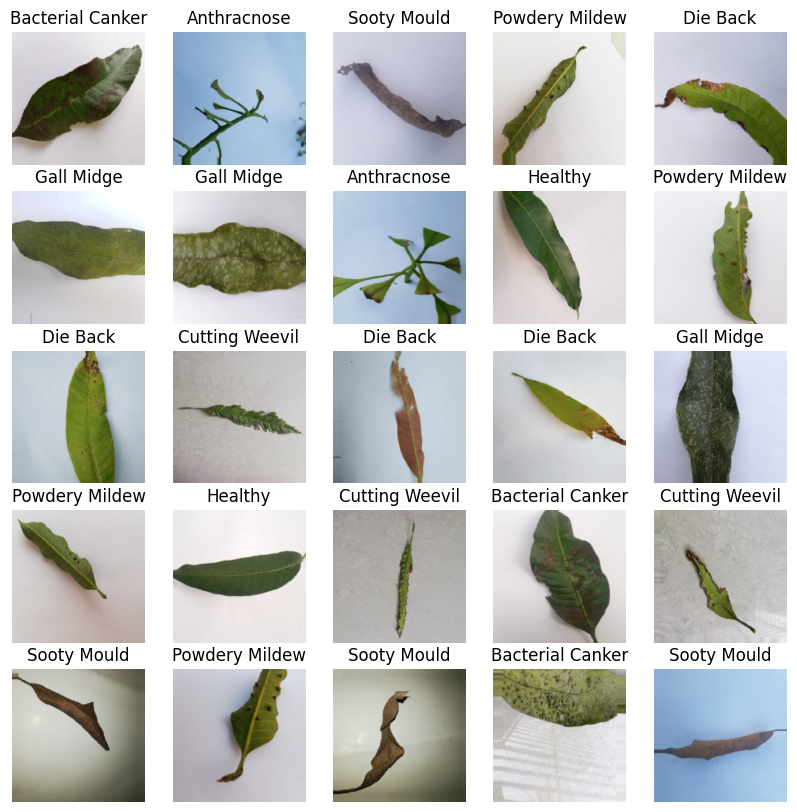

In [ ]:
#[2]:below code reference :https://www.kaggle.com/code/agbajeabdullateef/mango-disease-classification
image_batch, label_batch = next(train_data)
show_batch(image_batch, label_batch)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
#[2]:below code reference :https://www.kaggle.com/code/agbajeabdullateef/mango-disease-classification
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=10, validation_data=test_data)
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
model.save('mango_leaf_classifier.h5')



Epoch 1/10
14/14 [==============================] - 56s 3s/step - loss: 6.4769 - accuracy: 0.1644 - val_loss: 1.8136 - val_accuracy: 0.3063
Epoch 2/10
14/14 [==============================] - 41s 3s/step - loss: 1.5922 - accuracy: 0.3834 - val_loss: 1.3021 - val_accuracy: 0.5450
Epoch 3/10
14/14 [==============================] - 41s 3s/step - loss: 1.2099 - accuracy: 0.5691 - val_loss: 1.1710 - val_accuracy: 0.5888
Epoch 4/10
14/14 [==============================] - 40s 3s/step - loss: 1.0121 - accuracy: 0.6587 - val_loss: 0.8279 - val_accuracy: 0.7375
Epoch 5/10
14/14 [==============================] - 41s 3s/step - loss: 0.7011 - accuracy: 0.7600 - val_loss: 0.6685 - val_accuracy: 0.7500
Epoch 6/10
14/14 [==============================] - 40s 3s/step - loss: 0.6150 - accuracy: 0.7622 - val_loss: 0.6760 - val_accuracy: 0.7513
Epoch 7/10
14/14 [==============================] - 41s 3s/step - loss: 0.5463 - accuracy: 0.8006 - val_loss: 0.4873 - val_accuracy: 0.8487
Epoch 8/10
14/14 [==

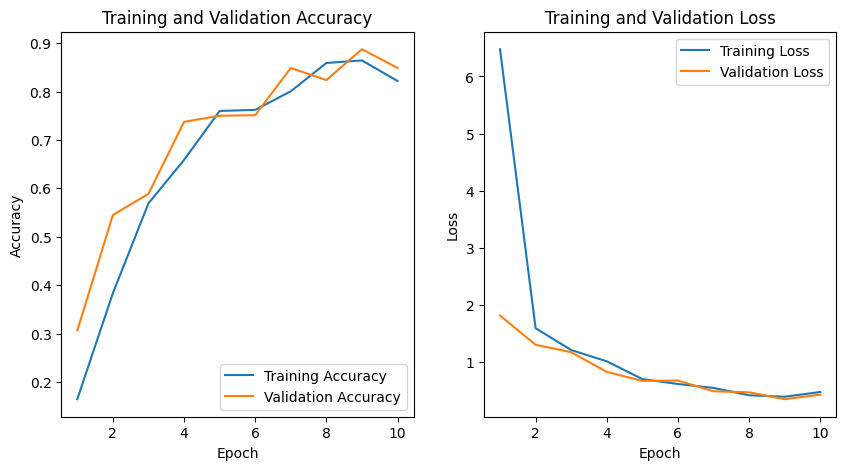

In [ ]:
#[2]:below code reference :https://www.kaggle.com/code/agbajeabdullateef/mango-disease-classification
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

#  training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
#[4]below code reference: https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

from tensorflow.keras.applications import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg_model.layers:
    layer.trainable = False
x = layers.Flatten()(vgg_model.output)
x = layers.Dense(256, activation='sigmoid')(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(8, activation='softmax')(x)

new_model = tf.keras.models.Model(inputs=vgg_model.input, outputs=predictions)
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_new = new_model.fit(train_data, epochs=10, validation_data=test_data)
test_loss, test_accuracy = new_model.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

new_model.save('vgg_net_classifier.h5')


Epoch 1/10
14/14 [==============================] - 48s 3s/step - loss: 2.0869 - accuracy: 0.3862 - val_loss: 1.2056 - val_accuracy: 0.6837
Epoch 2/10
14/14 [==============================] - 46s 3s/step - loss: 1.1154 - accuracy: 0.6419 - val_loss: 0.8081 - val_accuracy: 0.8025
Epoch 3/10
14/14 [==============================] - 48s 3s/step - loss: 0.8587 - accuracy: 0.7387 - val_loss: 0.6687 - val_accuracy: 0.8775
Epoch 4/10
14/14 [==============================] - 46s 3s/step - loss: 0.7730 - accuracy: 0.7784 - val_loss: 0.5535 - val_accuracy: 0.9075
Epoch 5/10
14/14 [==============================] - 47s 3s/step - loss: 0.5660 - accuracy: 0.8516 - val_loss: 0.4614 - val_accuracy: 0.9050
Epoch 6/10
14/14 [==============================] - 47s 3s/step - loss: 0.5048 - accuracy: 0.8834 - val_loss: 0.3594 - val_accuracy: 0.9275
Epoch 7/10
14/14 [==============================] - 46s 4s/step - loss: 0.4693 - accuracy: 0.8841 - val_loss: 0.3416 - val_accuracy: 0.9337
Epoch 8/10
14/14 [==

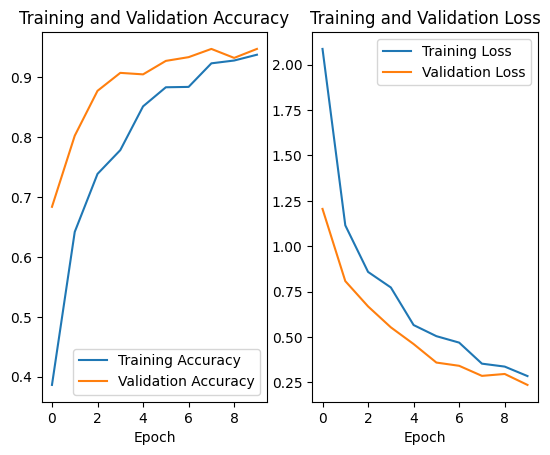

In [ ]:
#[2]:below code reference :https://www.kaggle.com/code/agbajeabdullateef/mango-disease-classification
plt.subplot(1, 2, 1)
plt.plot(history_new.history['accuracy'], label='Training Accuracy')
plt.plot(history_new.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history_new.history['loss'], label='Training Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

plt.show()

In [ ]:
#[5]below code reference:https://medium.com/geekculture/multiclass-image-classification-dcf9585f2ff9

from tensorflow.keras.preprocessing import image
def predict_from_image(img_path):
    model = tf.keras.models.load_model('vgg_net_classifier.h5')
    img = image.load_img(img_path, target_size=(224, 224))
    ima_ge_tensor = image.img_to_array(img)
    ima_ge_tensor = np.expand_dims(ima_ge_tensor, axis=0)
    ima_ge_tensor /= 255.

    pred = model.predict(ima_ge_tensor)
    predicted_class = np.argmax(pred[0])
    probability = pred[0][predicted_class]

    return predicted_class, probability

img_path = '/content/train_test/test/Healthy/20211231_123123 (Custom).jpg'
predicted_class, probability = predict_from_image(img_path)
predicted_class_name = CLASS_NAMES[predicted_class]
print(f"Predicted class: {predicted_class_name} with probability {probability:.2f}")




1/1 [==============================] - 0s 142ms/step
Predicted class: Healthy with probability 0.93
